# Bibliotecas

In [2722]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from imblearn.under_sampling import RandomUnderSampler, NearMiss, OneSidedSelection
from sklearn.decomposition import PCA

## RFE
from sklearn.feature_selection import RFE

# Verificação do dataset

In [2723]:
# data.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df = pd.read_csv('data.csv')
df.shape

(569, 33)

In [2724]:
df.sample()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
275,8911164,B,11.89,17.36,76.2,435.6,0.1225,0.0721,0.05929,0.07404,...,18.99,79.46,472.4,0.1359,0.08368,0.07153,0.08946,0.222,0.06033,NaN


In [2725]:
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [2726]:
# Verificando se existe linhas duplicadas
df = df.drop_duplicates()

In [2727]:
# Removendo colunas nao inrrelevantes
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

B    357
M    212
Name: diagnosis, dtype: int64


<AxesSubplot:ylabel='diagnosis'>

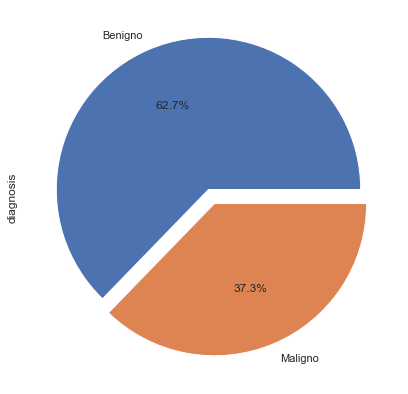

In [2728]:
mylabels = ["Benigno", "Maligno"]
print(df['diagnosis'].value_counts())
df['diagnosis'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0.05, 0.05],  labels = mylabels, figsize=(7, 7))

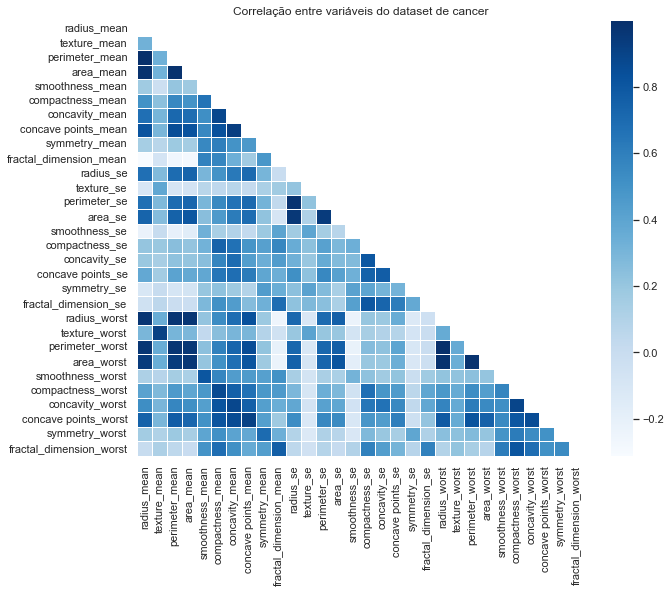

In [2729]:
plt.figure(figsize = (10, 8))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(data=df.corr(), cmap='Blues', linewidths=1, mask=mask)
plt.title('Correlação entre variáveis do dataset de cancer')
plt.show()

In [2730]:
df['diagnosis']=df['diagnosis'].map({'M':0,'B':1})

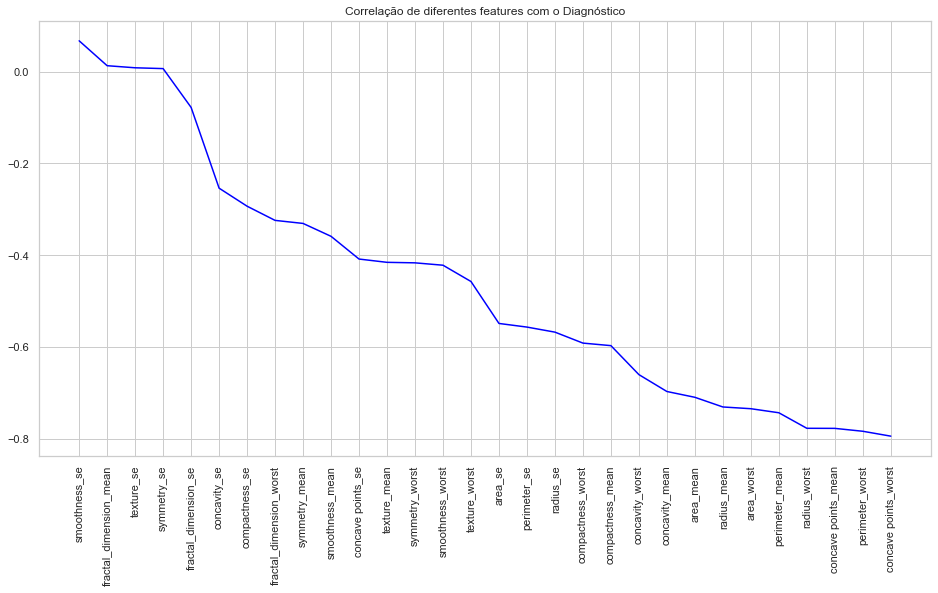

In [2731]:
plt.figure(figsize=(16,8))
plt.plot(df.corr()['diagnosis'].sort_values(ascending=False)[1:],color="blue")
plt.title("Correlação de diferentes features com o Diagnóstico")
plt.xticks(rotation=90)
plt.show()

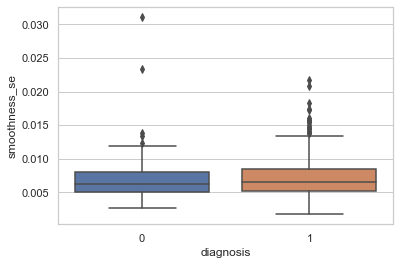

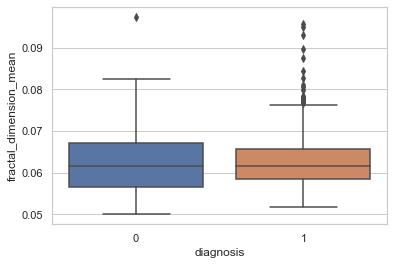

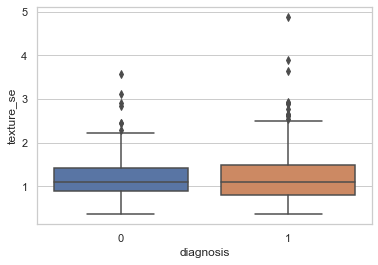

In [2732]:
sns.boxplot(data=df,x="diagnosis",y="smoothness_se")
plt.show()
sns.boxplot(data=df,x="diagnosis",y="fractal_dimension_mean")
plt.show()
sns.boxplot(data=df,x="diagnosis",y="texture_se")
plt.show()

# Regressão Logística sem tratamento dos dados

Vamos pegar o dados da forma que esstão no dataset e fazer o treinamento e teste.

In [2733]:
x = df.iloc[:,1:]
y = df.iloc[:,:1]

In [2734]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [2735]:
modelLogistic = LogisticRegression(max_iter=5000)
modelLogistic.fit(x_train,y_train.values.ravel())

LogisticRegression(max_iter=5000)

In [2736]:
print("Intercept b0= ", modelLogistic.intercept_)
print("Coefficient b1= ", modelLogistic.coef_)

Intercept b0=  [28.21457624]
Coefficient b1=  [[ 0.70098151  0.16111883 -0.1381171   0.02034436 -0.15110579 -0.18278534
  -0.37008174 -0.21847885 -0.30861938 -0.02811242 -0.03647333  0.97986389
  -0.04088549 -0.10620057 -0.01320631  0.06576782 -0.01219191 -0.02415006
  -0.03397633  0.01585082  0.26446243 -0.3864496  -0.22159095 -0.01047256
  -0.26453146 -0.61385811 -1.18135851 -0.46421466 -0.6790966  -0.08731059]]


In [2737]:
y_pred= modelLogistic.predict(x_test)

<AxesSubplot:>

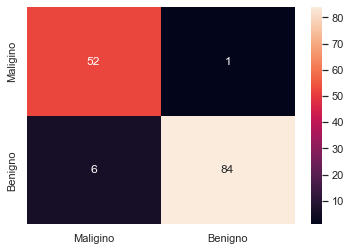

In [2738]:
ConfusionMatrix = confusion_matrix(y_test,y_pred, )
categorias = ['Maligino', 'Benigno']
sns.heatmap(ConfusionMatrix,annot=True, xticklabels = categorias,yticklabels = categorias)

In [2739]:
TP= ConfusionMatrix[1,1] #Verdadeiro Positivo
TN= ConfusionMatrix[0,0] #Verdadeiro Negativo
Total=len(y_test)
print("Acurácia da matriz de confusão: ", (TN+TP)/Total)

Acurácia da matriz de confusão:  0.951048951048951


In [2740]:
from sklearn.metrics import accuracy_score,classification_report
score = accuracy_score(y_pred,y_test)
print("Acurácia do sklearn: ",score)

Acurácia do sklearn:  0.951048951048951


In [2741]:
results = []

acc_svm = accuracy_score (y_test, y_pred)
results.append(acc_svm)
print("Acurácia", acc_svm)

pre_svm = precision_score (y_test, y_pred)
results.append(pre_svm)
print("Precisão", pre_svm)

rec_svm = recall_score (y_test, y_pred)
results.append(rec_svm)
print("Recall", rec_svm)

f1_svm = f1_score (y_test, y_pred)
results.append(f1_svm)
print("F1", f1_svm)

Acurácia 0.951048951048951
Precisão 0.9882352941176471
Recall 0.9333333333333333
F1 0.96


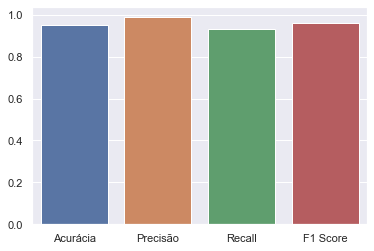

In [2742]:
nomes_score = ['Acurácia', 'Precisão', 'Recall', 'F1 Score']
sns.set_style('darkgrid')
sns.barplot(x=nomes_score, y=results)
plt.show()

# Regressão Logística Tratando os Dados

In [2743]:
scores=['accuracy', 'recall', 'f1', 'precision']

In [2744]:
def my_score(x,y,typeScore, k):
    results = []
    kfold= model_selection.KFold(shuffle=True, n_splits=k, random_state=0)
    for score in typeScore:
        cv_results = model_selection.cross_val_score(modelLogistic,x,y.values.ravel(),cv=kfold, scoring=score)
        results.append(cv_results)
        print("%s %f ( %f )" %(score,np.mean(cv_results), np.var(cv_results,ddof=1)))
 

    fig=plt.figure()
    fig.suptitle("Comparação Scores")
    ax= fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(scores)
    plt.show()

## Verificando variâncias e Normalização

## Sem Nomalização

In [2745]:
var_thr = VarianceThreshold(threshold=0.006) #Removendo tanto constante quanto quase constante 
var_thr.fit(x) 

concol = [column for column in x.columns 
          if column not in x.columns[var_thr.get_support()]]

for features in concol:
    print(features)

smoothness_mean
compactness_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
smoothness_worst
concave points_worst
symmetry_worst
fractal_dimension_worst


In [2746]:
x_Sem = x.drop(concol, axis=1)

In [2747]:
x_train,x_test,y_train,y_test = train_test_split(x_Sem,y,test_size=0.25,random_state=0)

In [2748]:
modelLogistic = LogisticRegression(max_iter=5000)
modelLogistic.fit(x_train,y_train.values.ravel())

LogisticRegression(max_iter=5000)

In [2749]:
y_pred = modelLogistic.predict(x_test)

In [2750]:
score = accuracy_score(y_pred,y_test)
print("Acurácia do sklearn: ",score)

Acurácia do sklearn:  0.951048951048951


## Com Nomalização

In [2751]:
#Normalização
dataf=((x-x.min())/(x.max()-x.min()))
x = dataf

In [2752]:
var_thr = VarianceThreshold(threshold=0.006) #Removendo tanto constante quanto quase constante 
var_thr.fit(x) 

VarianceThreshold(threshold=0.006)

In [2753]:
concol = [column for column in x.columns 
          if column not in x.columns[var_thr.get_support()]]

for features in concol:
    print(features)

concavity_se


In [2754]:
x = x.drop(concol, axis=1)

In [2755]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [2756]:
modelLogistic = LogisticRegression(max_iter=5000)
modelLogistic.fit(x_train,y_train.values.ravel())

LogisticRegression(max_iter=5000)

In [2757]:
y_pred = modelLogistic.predict(x_test)

<AxesSubplot:>

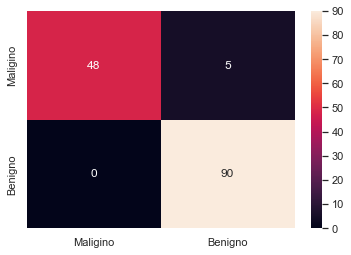

In [2758]:
ConfusionMatrix = confusion_matrix(y_test,y_pred)
categorias = ['Maligino', 'Benigno']
sns.heatmap(ConfusionMatrix,annot=True, xticklabels = categorias,yticklabels = categorias)

In [2759]:
score = accuracy_score(y_pred,y_test)
print("Acurácia do sklearn: ",score)

Acurácia do sklearn:  0.965034965034965


accuracy 0.968421 ( 0.000266 )
recall 0.994639 ( 0.000070 )
f1 0.975710 ( 0.000156 )
precision 0.957691 ( 0.000472 )


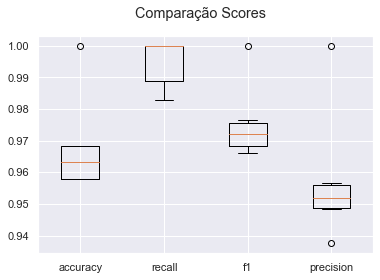

In [2760]:
my_score(x,y,scores,6)

## Balanceamento dos Dados

In [2761]:
pca = PCA(n_components=2)
data_2d = pd.DataFrame(pca.fit_transform(x))

In [2762]:
data_2d

,0,1
0,1.385189,0.438202
1,0.467342,-0.551209
2,0.955986,-0.102194
3,0.994582,1.539941
4,0.624741,-0.305991
...,...,...
564,1.002854,-0.474625
565,0.622250,-0.517285
566,0.224907,-0.292782
567,1.673949,0.344710


In [2763]:
data_2d= pd.concat([data_2d, y], axis=1)
data_2d.columns = ['x', 'y', 'diagnosis']


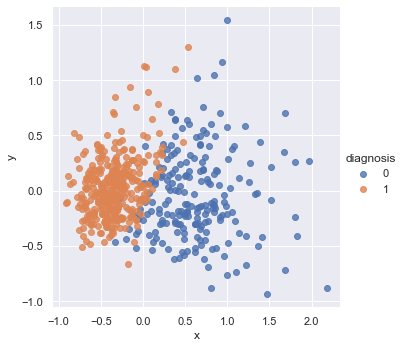

In [2764]:
sns.lmplot(x="x", y="y", data=data_2d, fit_reg=False, hue='diagnosis')

In [2765]:
# NearMiss
nm = NearMiss(version=1)
x, y = nm.fit_resample(x, y)

0    212
1    212
Name: diagnosis, dtype: int64


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

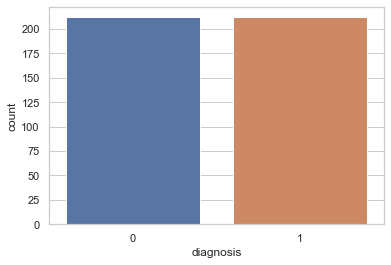

In [2766]:
df_undersampling = pd.DataFrame(data=y)

print(df_undersampling['diagnosis'].value_counts())
sns.set_theme(style="whitegrid")
sns.countplot(x=df_undersampling['diagnosis'])

accuracy 0.952966 ( 0.001377 )
recall 0.980288 ( 0.000894 )
f1 0.953200 ( 0.001561 )
precision 0.928291 ( 0.002909 )


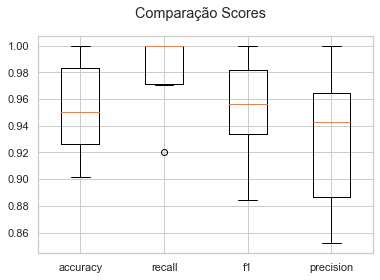

In [2767]:
my_score(x,y,scores, 7)

In [2768]:
data_2d_undersampling  = pd.DataFrame(pca.fit_transform(x))
data_2d_undersampling= pd.concat([data_2d_undersampling, df_undersampling['diagnosis']], axis=1)
data_2d_undersampling.columns = ['x', 'y', 'diagnosis']

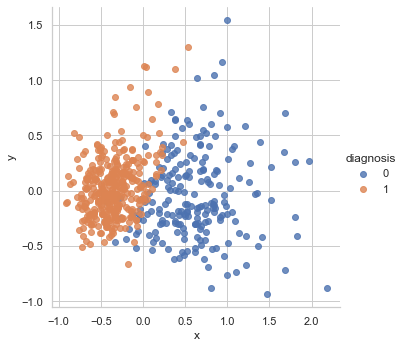

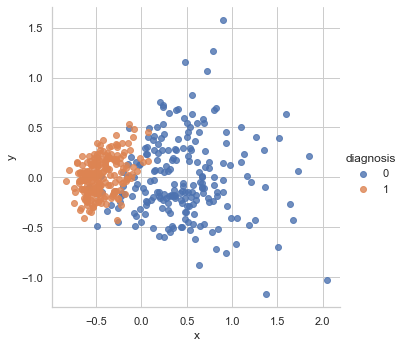

In [2769]:
sns.lmplot(x="x", y="y", data=data_2d, fit_reg=False, hue='diagnosis')
sns.lmplot(x="x", y="y", data=data_2d_undersampling, fit_reg=False, hue='diagnosis')